In [ ]:
## Importo librerías de Aprendizaje automático
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [ ]:
## Importo librerías de manipulación de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## Conectamos el drive y guardamos en set de datos en "BankS" especificando el delimitador de datos con sep
from google.colab import drive
drive.mount('/content/drive')
banks = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank_subscription.csv', sep=';')

Mounted at /content/drive


In [ ]:
## Visualizamos las 5 primeras filas
banks.head()

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58.0,NaN,NaN,NaN,no,2143.0,yes,NaN,unknown,5,may,261.0,1,-1.0,0,unknown,0
1,44.0,technician,single,secondary,no,NaN,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,0
2,33.0,entrepreneur,NaN,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,NaN,0,unknown,0
3,47.0,NaN,married,unknown,no,1506.0,NaN,no,unknown,5,may,92.0,1,-1.0,0,unknown,0
4,33.0,unknown,single,unknown,NaN,1.0,no,no,unknown,5,may,NaN,1,NaN,0,unknown,0


In [ ]:
## Imprimo las dimensiones del dataset
banks.shape

(45211, 17)

In [ ]:
## Visualizamos la cantidad datos en la feature Suscription
subscription_counts = banks['Subscription'].value_counts()
print(subscription_counts)

Subscription
0    39922
1     5289
Name: count, dtype: int64


In [ ]:
## Mostramos el tipo de dato con el comando .info
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    40238 non-null  float64
 1   Job                    40238 non-null  object 
 2   Marital Status         40238 non-null  object 
 3   Education              40238 non-null  object 
 4   Credit                 40238 non-null  object 
 5   Balance (euros)        40238 non-null  float64
 6   Housing Loan           37525 non-null  object 
 7   Personal Loan          37525 non-null  object 
 8   Contact                45211 non-null  object 
 9   Last Contact Day       45211 non-null  int64  
 10  Last Contact Month     45211 non-null  object 
 11  Last Contact Duration  37525 non-null  float64
 12  Campaign               45211 non-null  int64  
 13  Pdays                  37525 non-null  float64
 14  Previous               45211 non-null  int64  
 15  Po

In [ ]:
# Consulto algunas estadísticas descriptivas de los datos
banks.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,40238.0,NaN,NaN,NaN,40.929768,10.631666,18.0,33.0,39.0,48.0,95.0
Job,40238,12,blue-collar,8707,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital Status,40238,3,married,24222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,40238,4,secondary,20645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit,40238,2,no,39511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balance (euros),40238.0,NaN,NaN,NaN,1367.154257,3079.452512,-8019.0,72.0,448.0,1425.75,102127.0
Housing Loan,37525,2,yes,20817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Personal Loan,37525,2,no,31536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last Contact Day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


In [ ]:
## sumamos la cantidad de valores nulos por cada columna/variable
banks.isnull().sum()

,0
Age,4973
Job,4973
Marital Status,4973
Education,4973
Credit,4973
Balance (euros),4973
Housing Loan,7686
Personal Loan,7686
Contact,0
Last Contact Day,0


In [ ]:
#Luego de analizar los datos, se observan datos inconsistentes. Por ejemplo valores en la columna Pdays negativos.
#Se analiza la cantidad de datos negativos.
cantidad_de_menos_1 = banks[banks['Pdays'] == -1.0]['Pdays'].count()
print(f"La columna 'Pdays' tiene {cantidad_de_menos_1} filas con valor -1.0.")

La columna 'Pdays' tiene 30685 filas con valor -1.0.


In [ ]:
#Se observa que 30685 filas de 45211 corresponde a un valor negativo. Con lo cual se decide no utilizar la variable en el actual analisis ya que los registros de la columna no son confiables.
banks = banks.drop('Pdays', axis=1)

In [ ]:
## Volvemos a analizar el dataset
banks.shape

(45211, 16)

In [ ]:
# Consulto algunas estadísticas descriptivas de los datos
banks.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,40238.0,NaN,NaN,NaN,40.929768,10.631666,18.0,33.0,39.0,48.0,95.0
Job,40238,12,blue-collar,8707,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital Status,40238,3,married,24222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,40238,4,secondary,20645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit,40238,2,no,39511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balance (euros),40238.0,NaN,NaN,NaN,1367.154257,3079.452512,-8019.0,72.0,448.0,1425.75,102127.0
Housing Loan,37525,2,yes,20817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Personal Loan,37525,2,no,31536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last Contact Day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


In [ ]:
#Se confirma que se borro correctamente la columna Pdays. Se observa una inconsistencia en el feature Balance(euros), ya que los valores no pueden ser negativos siendo una cuenta ahorro.
#Se procede a eliminar los valores negativos de la feature.
banks = banks[banks['Balance (euros)'] >= 0]

In [ ]:
## Volvemos a analizar el dataset
banks.shape

(36902, 16)

In [ ]:
# Consulto algunas estadísticas descriptivas de los datos
banks.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,32830.0,NaN,NaN,NaN,41.080597,10.753186,18.0,33.0,39.0,49.0,95.0
Job,32856,12,management,7015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital Status,32852,3,married,19847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,32812,4,secondary,16551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit,32813,2,no,32518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balance (euros),36902.0,NaN,NaN,NaN,1519.241667,3170.217591,0.0,146.0,541.0,1593.0,102127.0
Housing Loan,30628,2,yes,16505,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Personal Loan,30696,2,no,26234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contact,36902,3,cellular,24103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last Contact Day,36902.0,NaN,NaN,NaN,15.730177,8.285478,1.0,8.0,16.0,21.0,31.0


In [ ]:
#Se confirma que se borro correctamente los registros con datos de Balance (euros) negativos.
#Se procede a eliminar los registros nulos.
banks = banks.dropna()

In [ ]:
## Volvemos a analizar el dataset
banks.shape

(11755, 16)

In [ ]:
## Revisamos que no queden valores nulos por cada columna/variable
banks.isnull().sum()

,0
Age,0
Job,0
Marital Status,0
Education,0
Credit,0
Balance (euros),0
Housing Loan,0
Personal Loan,0
Contact,0
Last Contact Day,0


Visualizamos los los tipos de datos existentes en las variables categoricas

In [ ]:
column_name = 'Job'
unique_values = banks[column_name].unique()

print(f"Unique values in column '{column_name}':")
print(unique_values)

Unique values in column 'Job':
['management' 'technician' 'services' 'retired' 'admin.' 'blue-collar'
 'housemaid' 'unemployed' 'entrepreneur' 'student' 'self-employed'
 'unknown']


In [ ]:
column_name = 'Contact'
unique_values = banks[column_name].unique()

print(f"Unique values in column '{column_name}':")
print(unique_values)

Unique values in column 'Contact':
['unknown' 'cellular' 'telephone']


In [ ]:
column_name = 'Poutcome'
unique_values = banks[column_name].unique()

print(f"Unique values in column '{column_name}':")
print(unique_values)

Unique values in column 'Poutcome':
['unknown' 'other' 'failure' 'success']


In [ ]:
## Visualizamos la cantidad datos en la feature Suscription luego que hicimos la limpieza
subscription_counts = banks['Subscription'].value_counts()
print(subscription_counts)

Subscription
0    10342
1     1413
Name: count, dtype: int64


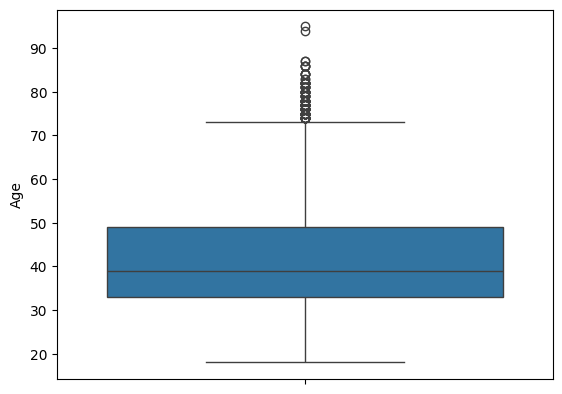

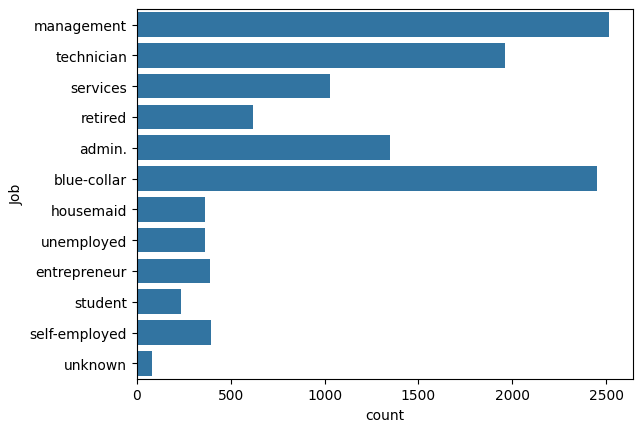

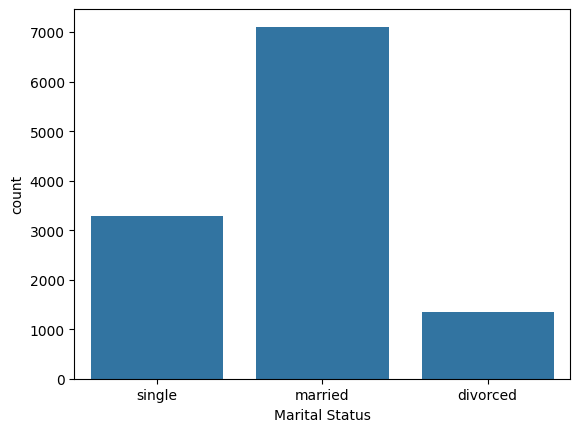

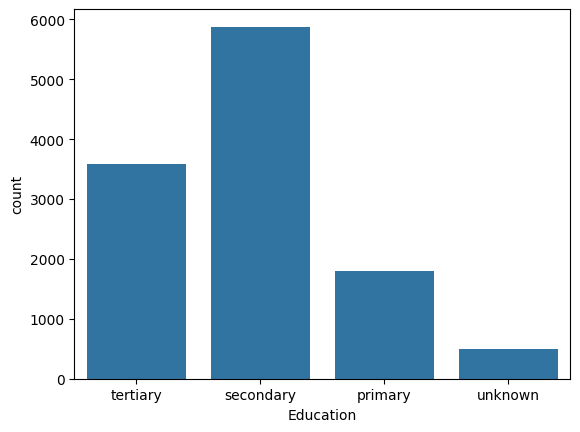

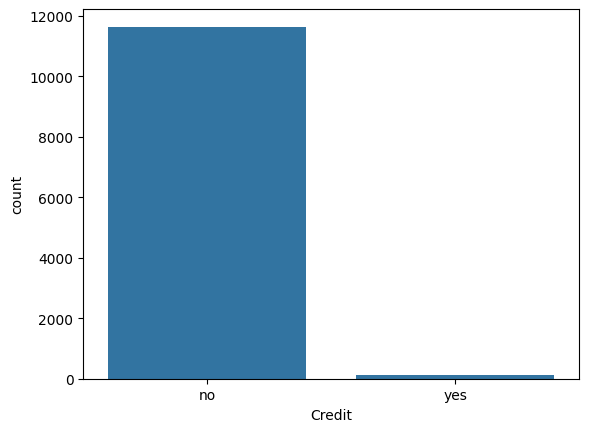

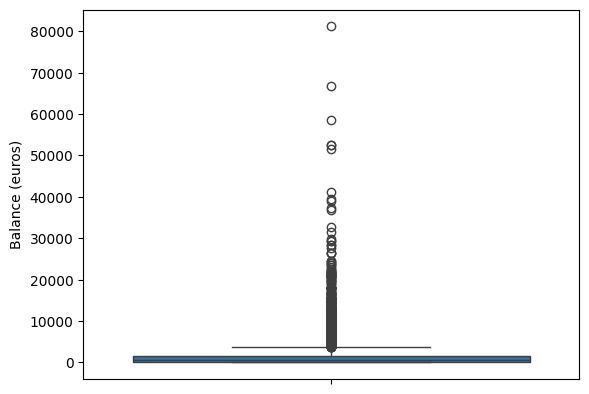

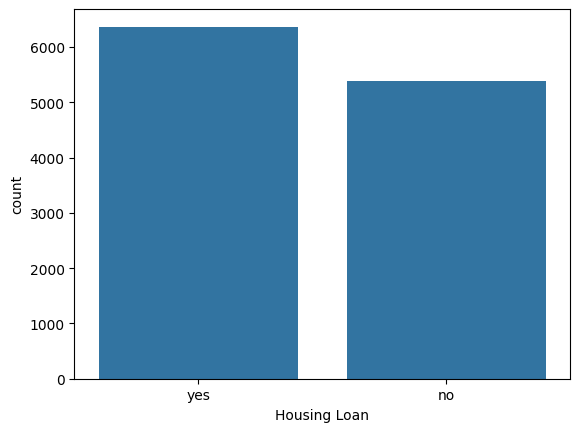

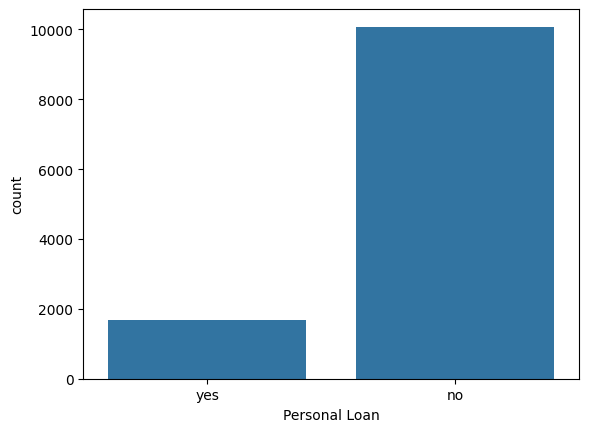

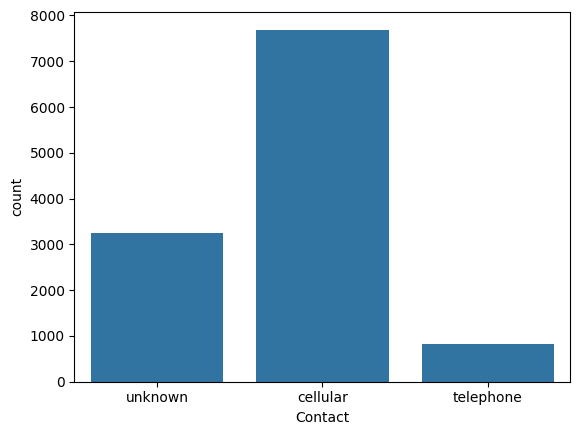

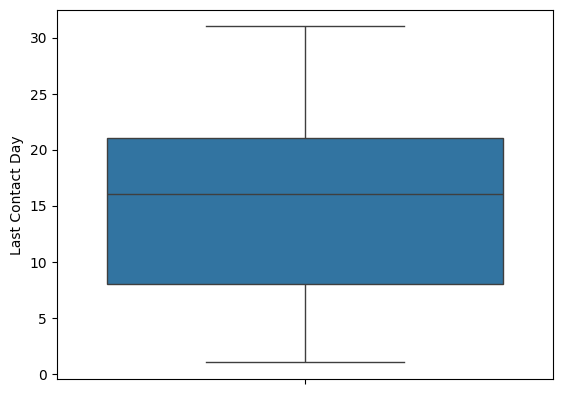

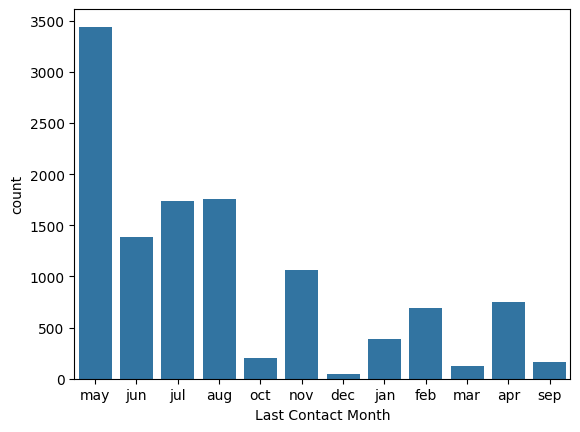

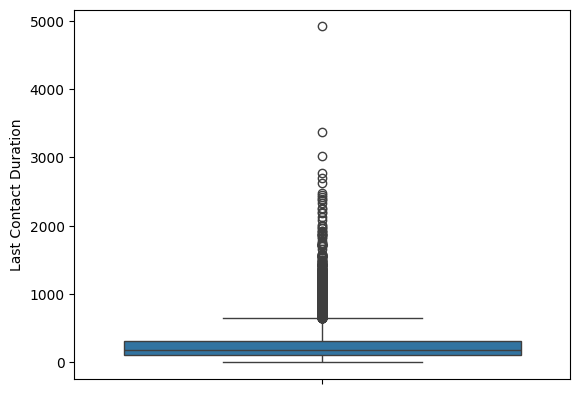

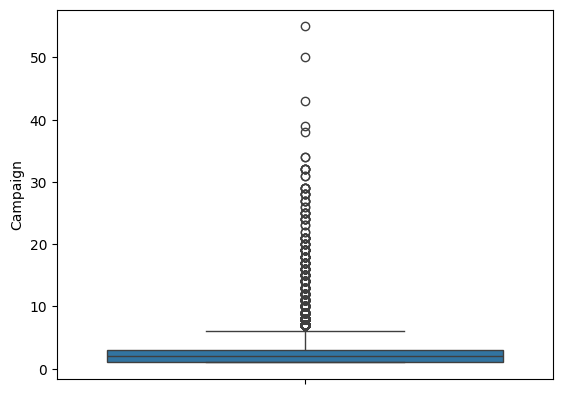

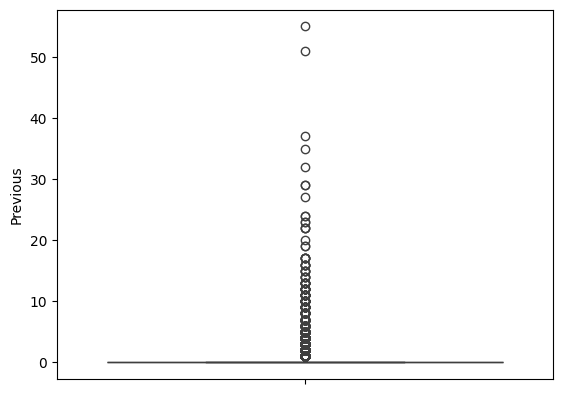

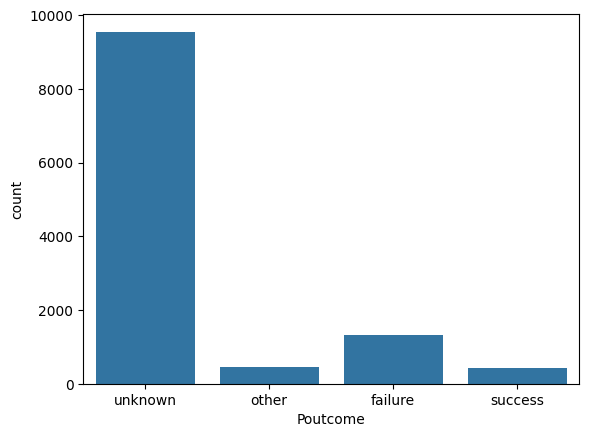

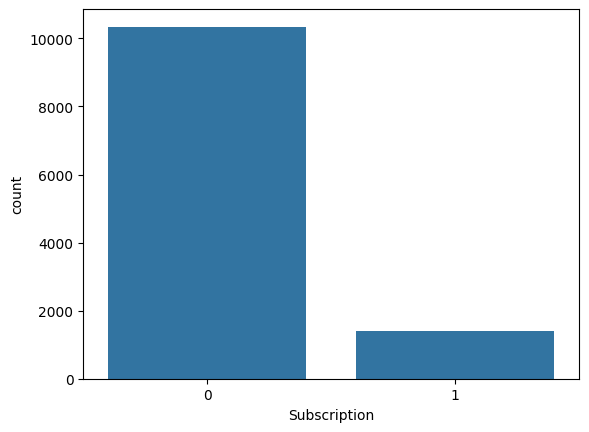

In [ ]:
#Analizamos la distribución de las variables mediante el gráfico Bloxplot y countplot.
sns.boxplot(y="Age", data=banks)
plt.show()

sns.countplot( y="Job" , data=banks)
plt.show()


sns.countplot( x="Marital Status" , data=banks)
plt.show()

sns.countplot( x="Education" , data=banks)
plt.show()

sns.countplot( x="Credit" , data=banks)
plt.show()

sns.boxplot(y="Balance (euros)", data=banks)
plt.show()

sns.countplot( x="Housing Loan" , data=banks)
plt.show()

sns.countplot( x="Personal Loan" , data=banks)
plt.show()

sns.countplot( x="Contact" , data=banks)
plt.show()

sns.boxplot(y="Last Contact Day", data=banks)
plt.show()

sns.countplot( x="Last Contact Month" , data=banks)
plt.show()

sns.boxplot(y="Last Contact Duration", data=banks)
plt.show()

sns.boxplot(y="Campaign", data=banks)
plt.show()

sns.boxplot(y="Previous", data=banks)
plt.show()

sns.countplot( x="Poutcome" , data=banks)
plt.show()

sns.countplot( x="Subscription" , data=banks)
plt.show()


In [ ]:
#Los Boxplot exponen algunas variables con valores Outliers. También se observa muchas features con valores "unknown", tanto en Boxplot como en Countplot.
# Se opta por no filtrar más los registros a fin de no disminuir la cantidad total de los mismos,
# ya que hasta el momento luego del EDA han sido aceptados tan solo 11755 registros de los 45211 iniciales.

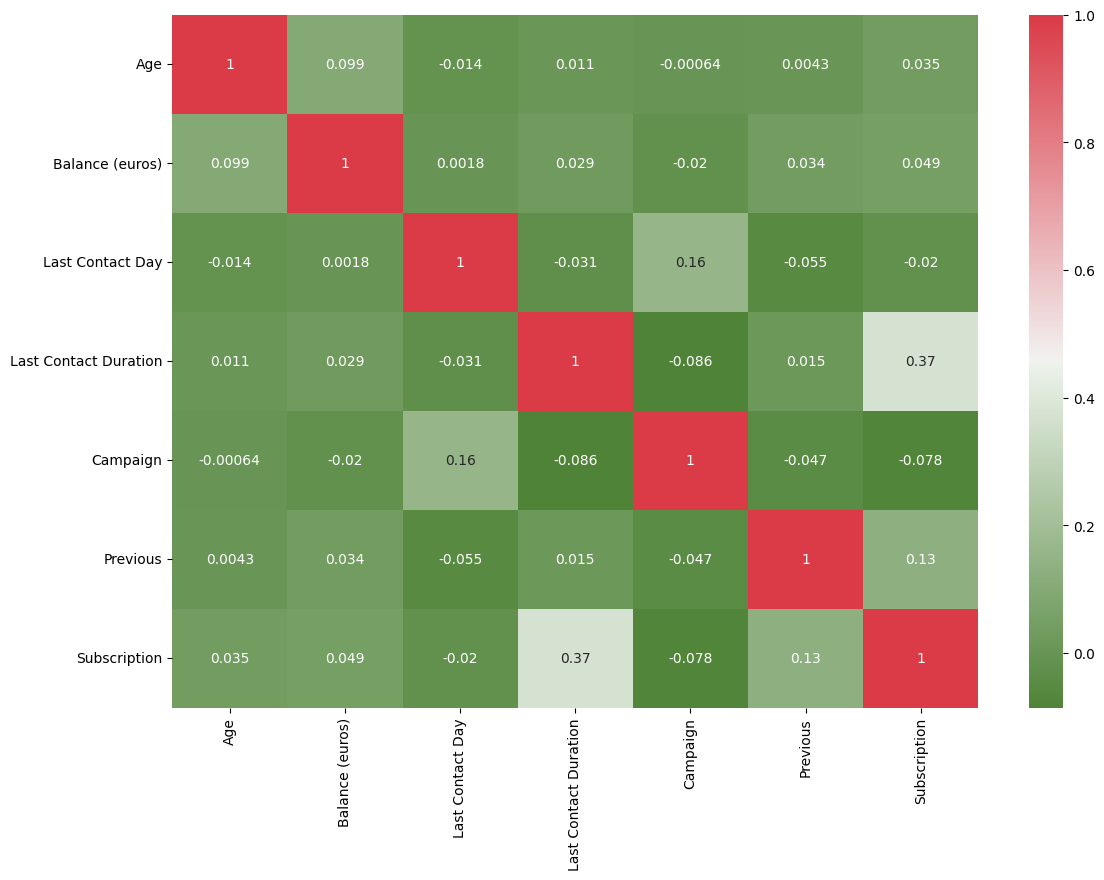

In [ ]:
#Realizamos un heat map para analizar la correlacion lineal.
corrmat = banks.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(13, 9))
ax = sns.heatmap(corrmat,
               annot=True,
               cmap=sns.diverging_palette(120, 10, as_cmap=True))
plt.show()

In [ ]:
#La correlación mayor correlación entre variables se encutra entre "Last Contact Duration" y "Subscription" (0.37). Las demás variables poseen bajos valores.

Construimos el modelo LogisticRegression con Pipeline

In [ ]:
# Diferenciemos los tipos de variables (numericas, categoricas)
categorical_features = ['Job', 'Marital Status', 'Education', 'Credit', 'Housing Loan', 'Personal Loan', 'Contact', 'Last Contact Month', 'Poutcome']
numerical_features = ['Age', 'Balance (euros)', 'Last Contact Duration', 'Last Contact Day', 'Campaign', 'Previous']

In [ ]:
# Definamos las transformaciones para cada tipo de variable
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

In [ ]:
# Combinamos los transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Creamos el pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [ ]:
# Separamos el set de datos en conjuntos de entrenamiento y prueba
X = banks.drop('Subscription', axis=1)
y = banks['Subscription']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Entrenamos el pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Balance (euros)',
                                                   'Last Contact Duration',
                                                   'Last Contact Day',
                                                   'Campaign', 'Previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Job', 'Marital Status',
                                                   'Education', 'Credit',
                                                   'Housing Loan',
                                                   'Personal Loan', 'Contact',
                                                   'Last Contact Month',
                                                   'Poutcome'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [ ]:
# Realizamos predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

In [ ]:
# Evalúamos el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"El Accuracy es de: {accuracy}")

El Accuracy es de: 0.89849730649277


In [ ]:
y_prob = pipeline.predict_proba(X_test)[:, 1]

In [ ]:
fpr1, tpr1, thresholds = roc_curve(y_test, y_prob)

In [ ]:
#Computamos el Area debajo de la curva ROC del modelo.
auc = roc_auc_score(y_test, y_prob)
print("El AUC es = "+ str(auc))

El AUC es = 0.9011578799731959


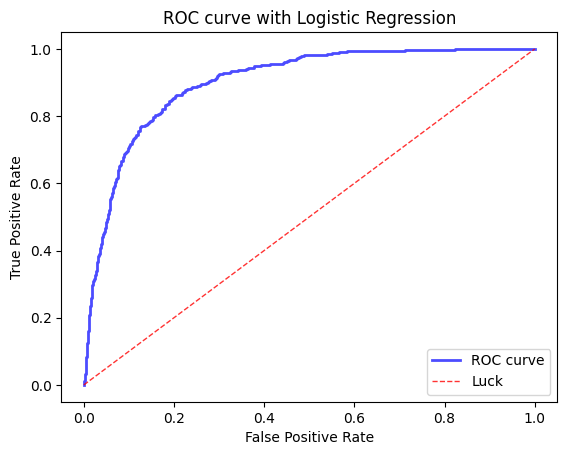

In [ ]:
plt.plot(fpr1, tpr1, lw=2, alpha=0.7, label='ROC curve', color='b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r', label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with Logistic Regression')
plt.show()

In [ ]:
# Compute confusion Matrix
cm = confusion_matrix(y_test, y_pred)

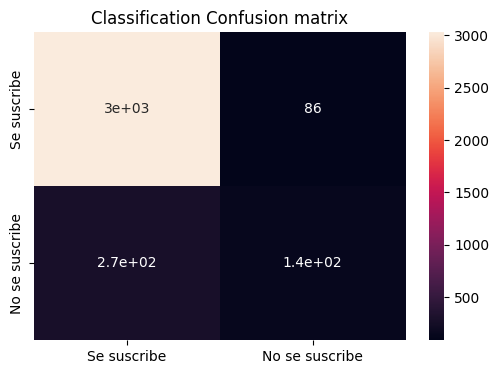

In [ ]:
df_cm = pd.DataFrame(cm, index = ['Se suscribe', 'No se suscribe'], columns = ['Se suscribe', 'No se suscribe'])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True)
plt.title('Classification Confusion matrix')
plt.show()

In [ ]:
# realizo un cross validation de 5 folds para ver la performance del modelo con distintas particiones de entrenamiento
cv_results = cross_validate(pipeline, X_train, y_train, cv=5)

In [ ]:
cv_results

{'fit_time': array([0.06835723, 0.09477568, 0.0873034 , 0.11250305, 0.08790159]),
 'score_time': array([0.01704335, 0.01580977, 0.01564932, 0.01757789, 0.01584649]),
 'test_score': array([0.90097205, 0.90097205, 0.89185905, 0.89361702, 0.89544073])}

In [ ]:
#El modelo de regresión logistica desarrollado ha alcanzado un AUC=0.9,
# con un buen rendimiento en cuanto a la predicción de la suscripción a la campaña de marketing.

**PCA: preparación y separación de datos**

In [ ]:
banks.shape

(11755, 16)

In [ ]:
# Separamos el set de datos en conjuntos de entrenamiento y prueba
X = banks.drop('Subscription', axis=1)
y = banks['Subscription']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)


In [ ]:
X.head()

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Previous,Poutcome
6,28.0,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217.0,1,0,unknown
9,43.0,technician,single,secondary,no,593.0,yes,no,unknown,5,may,55.0,1,0,unknown
14,57.0,services,married,secondary,no,162.0,yes,no,unknown,5,may,174.0,1,0,unknown
21,56.0,management,married,tertiary,no,779.0,yes,no,unknown,5,may,164.0,1,0,unknown
23,25.0,services,married,secondary,no,50.0,yes,no,unknown,5,may,342.0,1,0,unknown


In [ ]:
X.shape

(11755, 15)

In [ ]:
#El modelo PCA no soporta variables del tipo "categoricas", con lo cual las convertimos a Dummies para poder procesarlas
X = pd.get_dummies(data=X, columns=['Job', 'Marital Status', 'Education', 'Credit', 'Housing Loan', 'Personal Loan', 'Contact', 'Last Contact Month', 'Poutcome'], dtype=float)
banks.head()

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Previous,Poutcome,Subscription
6,28.0,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217.0,1,0,unknown,0
9,43.0,technician,single,secondary,no,593.0,yes,no,unknown,5,may,55.0,1,0,unknown,0
14,57.0,services,married,secondary,no,162.0,yes,no,unknown,5,may,174.0,1,0,unknown,0
21,56.0,management,married,tertiary,no,779.0,yes,no,unknown,5,may,164.0,1,0,unknown,0
23,25.0,services,married,secondary,no,50.0,yes,no,unknown,5,may,342.0,1,0,unknown,0


In [ ]:
# Consulto algunas estadísticas descriptivas de los datos
X.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Age,11755.0,41.174649,10.771951,18.0,33.0,39.0,49.0,95.0
Balance (euros),11755.0,1500.535347,3045.129931,0.0,143.0,530.0,1612.0,81204.0
Last Contact Day,11755.0,15.709826,8.304295,1.0,8.0,16.0,21.0,31.0
Last Contact Duration,11755.0,257.910251,259.610103,0.0,103.0,180.0,319.0,4918.0
Campaign,11755.0,2.761463,3.045220,1.0,1.0,2.0,3.0,55.0
Previous,11755.0,0.574394,1.931349,0.0,0.0,0.0,0.0,55.0
Job_admin.,11755.0,0.114590,0.318539,0.0,0.0,0.0,0.0,1.0
Job_blue-collar,11755.0,0.208507,0.406258,0.0,0.0,0.0,0.0,1.0
Job_entrepreneur,11755.0,0.033007,0.178663,0.0,0.0,0.0,0.0,1.0
Job_housemaid,11755.0,0.030880,0.173001,0.0,0.0,0.0,0.0,1.0


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=4)

In [ ]:
# Hacemos el auto scaling train-set (mean = 0, std = 1)

scaler = StandardScaler()
scaler.fit(xtrain)

StandardScaler()

In [ ]:
xtrain_scal = scaler.transform(xtrain)
xtest_scal = scaler.transform(xtest)

In [ ]:
xtrain_scal.shape

(8228, 50)

**PCA: preparación y separación de datos**

In [ ]:
# cantidad de componentes a extraer
n_comps = 10
# definimos PCA
pca = PCA(n_components= n_comps)
# fit_transform del PCA a nuestros datos
xpca = pd.DataFrame(pca.fit_transform(xtrain_scal))
# obtenemos los auto-valores
eigenvalues = pca.explained_variance_ratio_

In [ ]:
pca.explained_variance_

array([3.49128397, 2.97192   , 2.49526164, 2.38676991, 2.09094313,
       1.92553182, 1.77026659, 1.57895214, 1.47617729, 1.38297556])

In [ ]:
pca.explained_variance_ratio_

array([0.06981719, 0.05943118, 0.04989917, 0.0477296 , 0.04181378,
       0.03850596, 0.03540103, 0.0315752 , 0.02951996, 0.02765615])

In [ ]:
# observamos el shape de la matriz obtenida del PCA. Ver que nuestro dataset se redujo de 30 a 10 dimensiones
xpca.shape

(8228, 10)

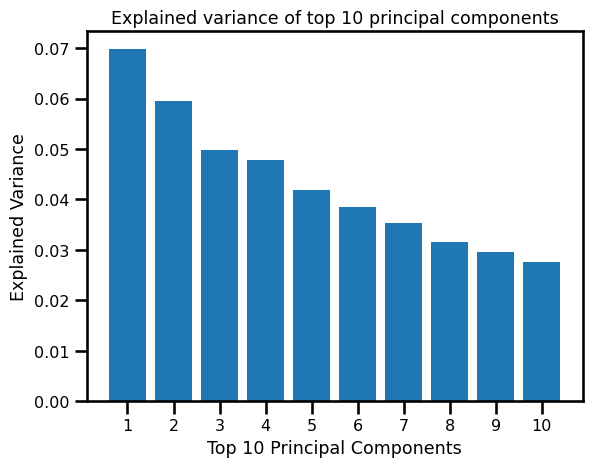

In [ ]:
#Observamos la varianza de los 10 componentes principales
components = range(1,n_comps + 1)
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Explained variance of top ' + str(n_comps) + ' principal components')
plt.xlabel('Top ' +str(n_comps) + ' Principal Components')
plt.ylabel('Explained Variance')
plt.show()

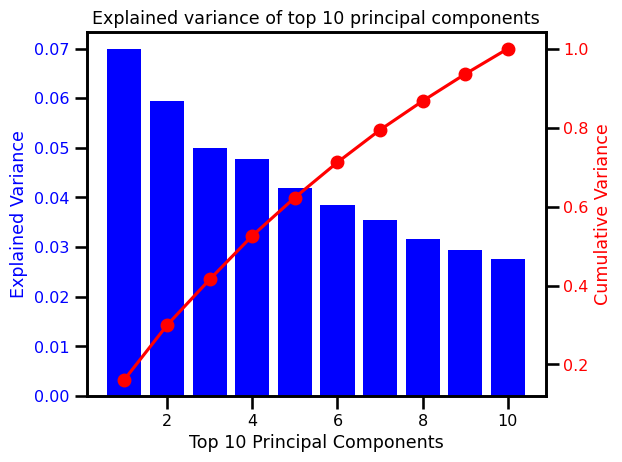

In [ ]:
#Graficaremos la variabilidad explicada acumulada
fig, ax1 = plt.subplots()

components = range(1, n_comps + 1)

# Graficar las barras de varianza explicada en el eje izquierdo
ax1.bar(components, eigenvalues, label='Explained Variance', color='blue')
ax1.set_xlabel('Top ' + str(n_comps) + ' Principal Components')
ax1.set_ylabel('Explained Variance', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje para la varianza acumulada
ax2 = ax1.twinx()
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

# Graficar la varianza acumulada en el eje derecho
ax2.plot(components, cumulative_variance, color='red', marker='o', label='Cumulative Variance')
ax2.set_ylabel('Cumulative Variance', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Configurar el título y las leyendas
plt.title('Explained variance of top ' + str(n_comps) + ' principal components')

fig.tight_layout()  # Ajustar el layout para que no se superpongan los ejes
plt.show()

In [ ]:
#Los componentes obtenidos poseen una varianza "similar", ya que para lograr alcanzar el 80% de la varianza acumulada se requieren 8 de los 10.

<ipython-input-81-5b8f8b79ebbb>:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  plt.scatter(xpca.loc[(ytrain == 0).ravel(),0],xpca.loc[(ytrain == 0).ravel(),1], alpha = 0.3, label = 'Rechaza')
<ipython-input-81-5b8f8b79ebbb>:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  plt.scatter(xpca.loc[(ytrain == 1).ravel(),0],xpca.loc[(ytrain == 1).ravel(),1], alpha = 0.3, label = 'Acepta')


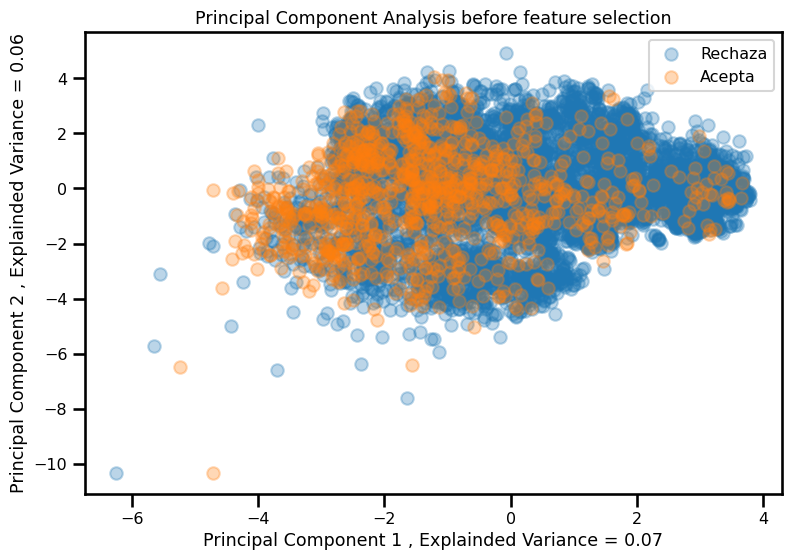

In [ ]:
#Se imprimen las 2 componentes principales, siendo la varianza acumulada del 30% aproximadamente del total.
sns.set_context("talk", font_scale=0.7)
plt.figure(figsize=(9,6))
plt.scatter(xpca.loc[(ytrain == 0).ravel(),0],xpca.loc[(ytrain == 0).ravel(),1], alpha = 0.3, label = 'Rechaza')
plt.scatter(xpca.loc[(ytrain == 1).ravel(),0],xpca.loc[(ytrain == 1).ravel(),1], alpha = 0.3, label = 'Acepta')
plt.xlabel('Principal Component 1 , Explainded Variance = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance = ' + str(np.round(eigenvalues[1],2)))
plt.title('Principal Component Analysis before feature selection')
plt.legend(loc='upper right')
plt.show()

**Predicción del problema con variables reducidas obtenidas del PCA**

In [ ]:
from sklearn.decomposition import PCA, KernelPCA

In [ ]:
# Cantidad de PC quer queremos
reduced_dim = 2
# Definimos nuestro nuevo X de dimension reducida
xpca_rd = xpca.iloc[:,0:reduced_dim]

In [ ]:
xpca_rd.head()

,0,1
0,0.371055,-3.730859
1,3.673848,0.385693
2,-0.353941,-2.241769
3,1.977137,-0.048637
4,1.421458,0.314623


In [ ]:
xpca_rd.shape

(8228, 2)

In [ ]:
# Separamos el set de datos en conjuntos de entrenamiento y prueba
X = xpca_rd
y = y_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Desarrollamos un modelo de logistic regretion para predecir los datos obtenidos del PCA.
# no utilizamos el pipeline anterior ya que quedo configurado para las columnas del dataset inicial (categoricas y númericas).

# defino modelo LR llamado model_lr
model_lr = LogisticRegression()

In [ ]:
# realizo un cross validation de 5 folds para ver la performance del modelo con distintas particiones de entrenamiento
cv_results = cross_validate(model_lr, xtrain_scal, ytrain, cv=5)



In [ ]:
# analizamos los resultados de cada iteracion del cross validation.
# Este objeto indica el tiempo que tomo cada iteracion, y en "test_score" cuanto dio el resultado de accuracy
cv_results




{'fit_time': array([0.04976034, 0.03751993, 0.03846836, 0.04232931, 0.04672933]),
 'score_time': array([0.00364971, 0.00316668, 0.00314689, 0.00301766, 0.00308371]),
 'test_score': array([0.89125152, 0.90279465, 0.89246659, 0.8881459 , 0.90212766])}

In [ ]:
# estudiamos como fue el promedio de todos los accuracys a lo largo de todas las iteraciones de cross validation
np.mean(cv_results['test_score'])


0.8953572628865409

In [ ]:
# Ajusto mi modelo a las muestras de training utilizando tanto Xtrain como Ytrain
model_lr.fit(xtrain_scal, ytrain)

LogisticRegression()

In [ ]:
# Genero predicciones con mi modelo entrenado para las muestras de Test, utilizando solo Xtest
ypred = model_lr.predict(xtest_scal)

In [ ]:
# Computo el accuracy (comparar ytest vs ypred)
test_acc = accuracy_score(ytest, ypred)
print("El accuracy es " + str(test_acc))

El accuracy es 0.8993478877232776


In [ ]:
#compute and plot AUC
yproba = model_lr.predict_proba(xtest_scal)
fpr1, tpr1, thresholds = roc_curve(ytest.astype('int'), yproba[:,1], drop_intermediate = False)
auc = metrics.auc(fpr1, tpr1)
print("El AUC es = " + str(auc))

El AUC es = 0.9085976235089099


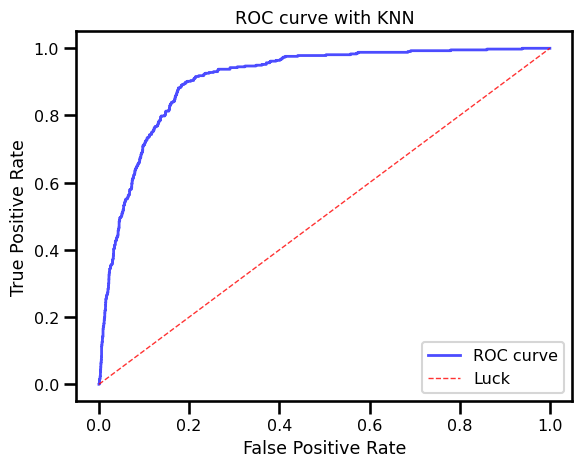

In [ ]:
plt.plot(fpr1, tpr1, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with KNN')
plt.show()

In [ ]:
# Compute confusion Matrix
cm = confusion_matrix(ytest, ypred)
cm

array([[3024,   86],
       [ 269,  148]])

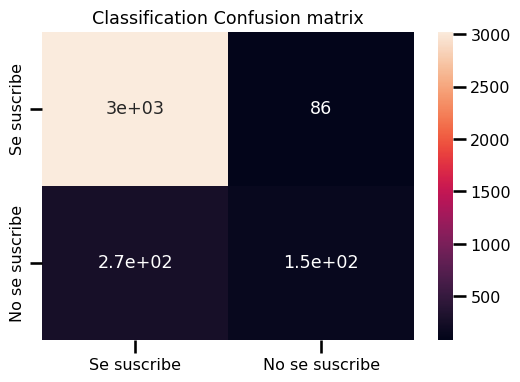

In [ ]:
df_cm = pd.DataFrame(cm, index = ['Se suscribe', 'No se suscribe'], columns = ['Se suscribe', 'No se suscribe'])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True)
plt.title('Classification Confusion matrix')
plt.show()

In [ ]:
#Luego de volver a predecir el problema con dimension reducida del PCA obtuvimos resultados similares (Accuracy inicial= 0.89849730649277 vs Accuracy reducido= 0.8993478877232776)
#Es decir se mantuvo la precisión, logrando una gran reducción de la complejidad del problema
# y aumento de la performance del modelo (cantidad de features iniciales =16 vs fetures final=2).